In [454]:
import numpy as np  
import matplotlib.pyplot as plt

In [455]:
def plot_point(M, color, alpha=1):
    # matPoint contient les coordonnées des points 
    x = M[0, :]
    y = M[1, :]
    plt.plot(x, y, color=color, alpha=alpha)

In [456]:
def plot_segment(P1, P2, color):
    # attention P1 et P2 sont des tableaux (2,1)
    matP = np.concatenate(
        (P1, P2),
        1
    )
    visu_point(matP, color)

In [457]:
def mat_rotation(theta):
    # si pas besoin des coordonnées homogènes
    mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    return mat

In [458]:
def plot_quadratic_bezier(M, color):
    n=50
    mt = np.linspace(0,1.,n)
    matt = np.ones((3,n)) # que des 1
    matt[1,:] = mt # ligne avec les t
    matt[2,:] = mt*mt # ligne avec les t*t

    matBezier3 = np.array([
        [1, 0, 0],
        [-2, 2, 0],
        [1, -2, 1]
    ])
    
    matPointligne = np.dot(np.dot(matt.T,matBezier3), M.T)
    
    matPoint = matPointligne.T

    plot_point(M, "r.")
    plot_point(M, "b:")
    plot_point(matPoint, color)

In [459]:
def plot_cubic_bezier(M, color, alpha=1):
    n=50
    mt = np.linspace(0,1.,n)  
    matt = np.ones((4,n))
    matt[1,:] = mt
    matt[2,:] = mt*mt
    matt[3,:] = mt*mt*mt
    
    matBezier4 = np.array([
            [1, 0, 0, 0],
            [-3, 3, 0, 0],
            [3, -6, 3, 0],
            [-1, 3, -3, 1]
        ])
    
    matPointligne = np.dot(np.dot(matt.T,matBezier4), M.T)
    matPoint = matPointligne.T

    plot_point(M, "black", alpha=0.)
    plot_point(M, "green", alpha=0.)
    plot_point(matPoint, color, alpha=alpha)

(-12.0, 12.0)

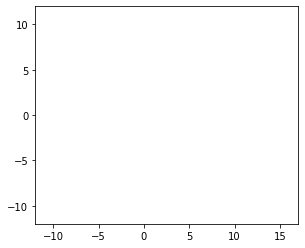

In [460]:
plt.axis('scaled') # la position est importante
taille=11
plt.xlim(-taille-1, taille+1+5)  
plt.ylim(-taille-1, taille+1)

In [461]:
plt.close()

In [462]:
mat4P1 = np.array([
    [-10, 0],
    [0, 5],
    [0, -5],
    [10, 0],
])

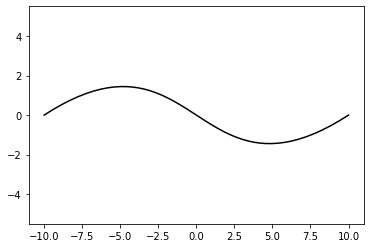

In [463]:
plot_cubic_bezier(mat4P1.T, "k")
plt.show()

In [464]:
plt.close()

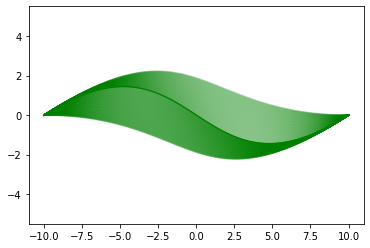

In [465]:
mat4P1 = np.array([
    [-10, 0],
    [0, 5],
    [0, -5],
    [10, 0],
])
plot_cubic_bezier(mat4P1.T, "g")

for i in np.arange(0, 5, 0.1):
    mat4P1 = np.array([
        [-10, 0],
        [0, i],
        [0, -5],
        [10, 0],
    ])
    plot_cubic_bezier(mat4P1.T, "g", 0.5)

for i in np.arange(0, 5, 0.1):
    mat4P1 = np.array([
        [-10, 0],
        [0, 5],
        [0, -i],
        [10, 0],
    ])
    plot_cubic_bezier(mat4P1.T, "g", 0.3)
    
plt.show()

## Rotation

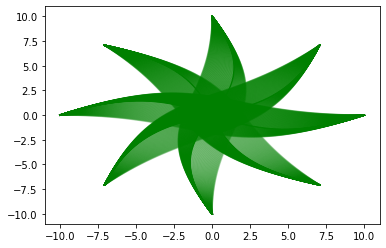

In [467]:
for angle in range(180, 360, 45):
    mat4P1 = np.array([
        [-10, 0],
        [0, 5],
        [0, -5],
        [10, 0],
    ])
    plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green")

    for i in np.arange(0, 5, 0.1):
        mat4P1 = np.array([
            [-10, 0],
            [0, i],
            [0, -5],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green", 0.5)

    for i in np.arange(0, 5, 0.1):
        mat4P1 = np.array([
            [-10, 0],
            [0, 5],
            [0, -i],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green", 0.3)


plt.show()

## Fleur

In [478]:
def plot_fleur(petales, largeur=5, color="green"):
    for angle in range(petales):
        mat4P1 = np.array([
            [-10, 0],
            [0, 5],
            [0, -5],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.5)

        for i in np.arange(0, largeur, 0.1):
            mat4P1 = np.array([
                [-10, 0],
                [0, i],
                [0, -5],
                [10, 0],
            ])
            plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.3)

        for i in np.arange(0, largeur, 0.1):
            mat4P1 = np.array([
                [-10, 0],
                [0, 5],
                [0, -i],
                [10, 0],
            ])
            plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.1)


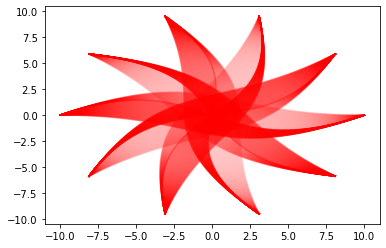

In [479]:
plot_fleur(5, 5, "red")
plt.show()

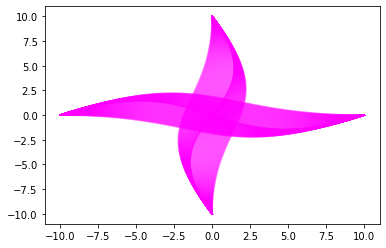

In [480]:
plot_fleur(4, 5, "fuchsia")
plt.show()

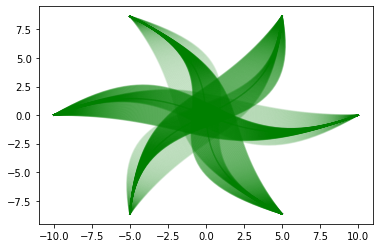

In [481]:
plot_fleur(3, 8, "green")
plt.show()